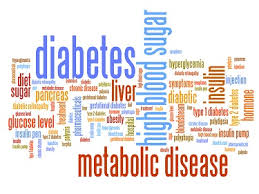

# Diabetes
It is a chronic (long-lasting) health condition that affects how your body turns food into energy.

Most of the food you eat is broken down into sugar (also called glucose) and released into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. Insulin acts like a key to let the blood sugar into your body’s cells for use as energy.

If you have diabetes, your body either doesn’t make enough insulin or can’t use the insulin it makes as well as it should. When there isn’t enough insulin or cells stop responding to insulin, too much blood sugar stays in your bloodstream. Over time, that can cause serious health problems, such as heart disease, vision loss, and kidney disease.

### import libraries

In [143]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import itertools

In [144]:
diabetes = pd.read_csv('diabetes.csv')

### data wrangling

In [145]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

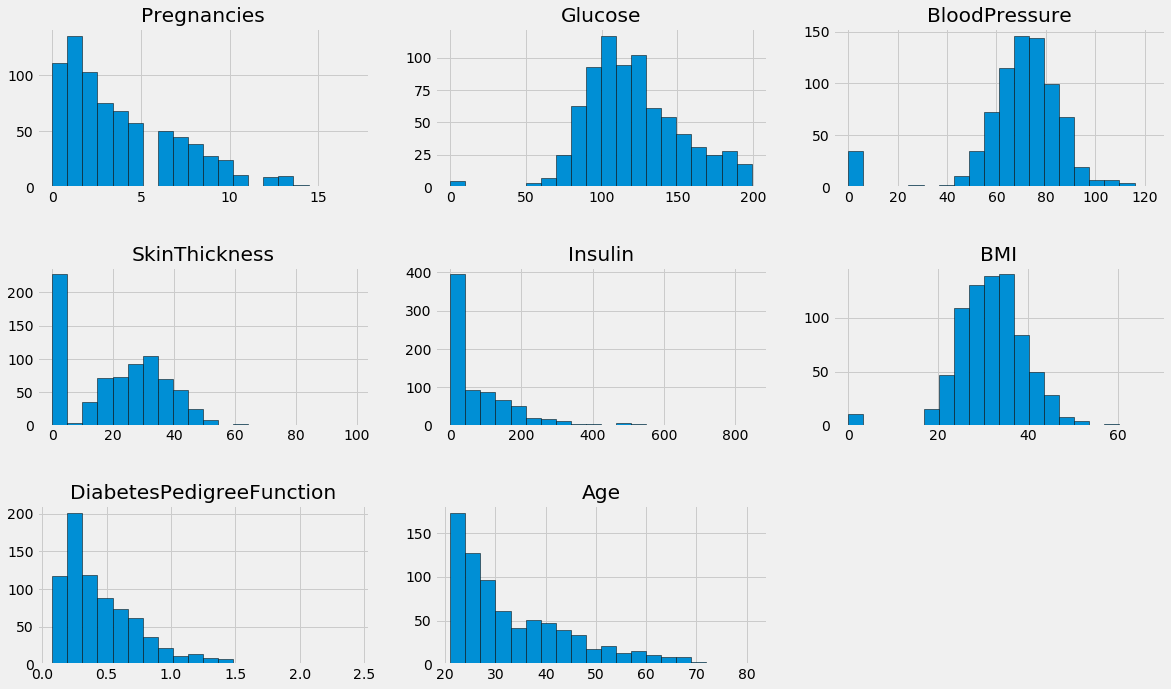

In [146]:
columns=diabetes.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diabetes[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [147]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x:(x - x.min())/(x.max()-x.min()))

In [148]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,30,0
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,26,1
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,29,0
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,53,1
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,54,1


In [149]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [150]:
diabetes.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

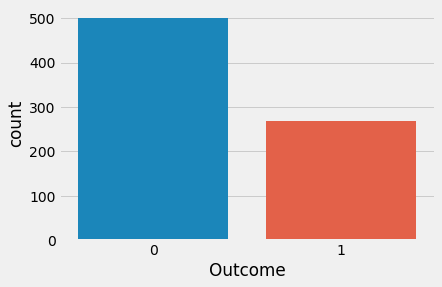

In [151]:
sns.countplot(x='Outcome',data=diabetes)
plt.show()

####  defining feature columns

In [152]:
Pregnan=tf.feature_column.numeric_column('Pregnancies')
Gluco=tf.feature_column.numeric_column('Glucose')
BloodPre=tf.feature_column.numeric_column('BloodPressure')
SkinThi=tf.feature_column.numeric_column('SkinThickness')
Insu=tf.feature_column.numeric_column('Insulin')
BMI=tf.feature_column.numeric_column('BMI')
DiabPedi=tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age=tf.feature_column.numeric_column('Age')

In [153]:
# another way for categorical data
#assigned_group= tf.feature_column.categorical_column_with_hash_bucket('group', hash_bucket_size=10)

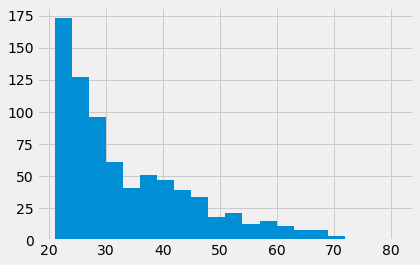

In [154]:
diabetes['Age'].hist(bins=20)

In [155]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [156]:
feat_cols= [Pregnan,Gluco,BloodPre,SkinThi,Insu,BMI,DiabPedi,age_bucket]

In [157]:
age_bucket

BucketizedColumn(source_column=NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80))

# Classifying data in Train Test using Train Test Split

In [158]:
labels = diabetes.pop('Outcome')

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(diabetes,labels,test_size=.3,random_state=101)

In [161]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
711,0.294118,0.633166,0.639344,0.272727,0.026005,0.441133,0.154142,40
58,0.000000,0.733668,0.672131,0.000000,0.000000,0.603577,0.727156,44
216,0.294118,0.547739,0.508197,0.414141,0.152482,0.533532,0.186166,25
168,0.235294,0.552764,0.540984,0.000000,0.000000,0.475410,0.167805,29
658,0.647059,0.638191,0.868852,0.000000,0.000000,0.581222,0.047822,51


In [162]:
y_train.head()

711    0
58     0
216    1
168    0
658    0
Name: Outcome, dtype: int64

#### putting input using input_func into tf.estimator.LinearClassifier

In [163]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y= y_train, batch_size=10,num_epochs=1000, shuffle=True)

In [164]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2) 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ernag\\AppData\\Local\\Temp\\tmpirqzdg38', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D7CC1F08D0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [165]:
modelDNN =tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ernag\\AppData\\Local\\Temp\\tmpzhuv0l2y', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D7CFD220B8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [166]:
model.train(input_fn= input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ernag\AppData\Local\Temp\tmpirqzdg38\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 123.334
INFO:tensorflow:loss = 7.76768, step = 101 (0.815 sec)
INFO:tensorflow:global_step/sec: 312.575
INFO:tensorflow:loss = 3.9849913, step = 201 (0.320 sec)
INFO:tensorflow:global_step/sec: 324.76
INFO:tensorflow:loss = 6.45248, step = 301 (0.316 sec)
INFO:tensorflow:global_step/sec: 304.618
INFO:tensorflow:loss = 5.425858, step = 401 (0.324 sec)
INFO:tensorflow:global_step/sec: 290.769
INFO:tensorflow:loss = 3.5754752, step = 501 (0.336 sec)
INFO:tensorflow:global_step/sec: 308.721
INFO:tensorflow:loss = 4.8924055, step = 601 (0.328 sec)
INFO:tensorflow:global_step/sec: 30

In [167]:
modelDNN.train(input_fn= input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ernag\AppData\Local\Temp\tmpzhuv0l2y\model.ckpt.
INFO:tensorflow:loss = 6.777791, step = 1
INFO:tensorflow:global_step/sec: 150.542
INFO:tensorflow:loss = 5.3288007, step = 101 (0.668 sec)
INFO:tensorflow:global_step/sec: 286.764
INFO:tensorflow:loss = 4.916602, step = 201 (0.345 sec)
INFO:tensorflow:global_step/sec: 290.614
INFO:tensorflow:loss = 6.285075, step = 301 (0.344 sec)
INFO:tensorflow:global_step/sec: 280.968
INFO:tensorflow:loss = 6.669027, step = 401 (0.356 sec)
INFO:tensorflow:global_step/sec: 304.953
INFO:tensorflow:loss = 4.304192, step = 501 (0.332 sec)
INFO:tensorflow:global_step/sec: 293.928
INFO:tensorflow:loss = 5.753232, step = 601 (0.336 sec)
INFO:tensorflow:global_step/sec: 2

#### Evaluating the data and checking the accuracy

In [168]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [169]:
results=model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-12T10:19:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ernag\AppData\Local\Temp\tmpirqzdg38\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-08-12-10:19:18
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.80090535, auc_precision_recall = 0.6542008, average_loss = 0.5267591, global_step = 1000, label/mean = 0.35064936, loss = 5.0700564, precision = 0.62666667, prediction/mean = 0.38315487, recall = 0.5802469
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\ernag\AppData\Local\Temp\tmpirqzdg38\model.ckpt-1000


In [170]:
resultsDNN =modelDNN.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-12T10:19:24Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ernag\AppData\Local\Temp\tmpzhuv0l2y\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-08-12-10:19:26
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.83004117, auc_precision_recall = 0.715037, average_loss = 0.50787574, global_step = 1000, label/mean = 0.35064936, loss = 4.8883038, precision = 0.60194176, prediction/mean = 0.44092855, recall = 0.7654321
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\ernag\AppData\Local\Temp\tmpzhuv0l2y\model.ckpt-1000


In [171]:
# Accuracy is much better by other models but i just wanted to learn tf.estimator
results


{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80090535,
 'auc_precision_recall': 0.6542008,
 'average_loss': 0.5267591,
 'label/mean': 0.35064936,
 'loss': 5.0700564,
 'precision': 0.62666667,
 'prediction/mean': 0.38315487,
 'recall': 0.5802469,
 'global_step': 1000}

In [172]:
resultsDNN

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83004117,
 'auc_precision_recall': 0.715037,
 'average_loss': 0.50787574,
 'label/mean': 0.35064936,
 'loss': 4.8883038,
 'precision': 0.60194176,
 'prediction/mean': 0.44092855,
 'recall': 0.7654321,
 'global_step': 1000}

In [173]:
### Now we can put data for predictions 

In [174]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [175]:
predictions = model.predict(pred_input_func)

In [176]:
predictions


<generator object EstimatorV2.predict at 0x000001D7CFD2C408>

In [177]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ernag\AppData\Local\Temp\tmpirqzdg38\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.09428787], dtype=float32),
  'logistic': array([0.5235545], dtype=float32),
  'probabilities': array([0.47644547, 0.5235545 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.694324], dtype=float32),
  'logistic': array([0.6669281], dtype=float32),
  'probabilities': array([0.33307186, 0.6669281 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.37233722], dtype=float32),
  'logistic': array([0.4079764], dtype=float32),
  'probabilities': array([0.5920236, 0.4079764], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.71835244], dtype=float32),
  'logistic': array([0.3277559], dtype=float32),
  'probabilities': array([0.6722441 , 0.32775587], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': ar

# the end